In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# data = pd.read_csv(".csv")
# data.head()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
benign=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.benign.csv')
g_c=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.gafgyt.combo.csv')
g_j=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.gafgyt.junk.csv')
g_s=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.gafgyt.scan.csv')
g_t=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.gafgyt.tcp.csv')
g_u=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.gafgyt.udp.csv')
m_a=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.mirai.ack.csv')
m_sc=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.mirai.scan.csv')
m_sy=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.mirai.syn.csv')
# m_u=pd.read_csv('/content/drive/MyDrive/iot-dataset/2/2.mirai.udp.csv')
# m_u_p=pd.read_csv('/content/drive/MyDrive/iot-dataset/2/2.mirai.udpplain.csv')

In [4]:
benign['type']='benign'
# m_u['type']='attack'
g_c['type']='combo'
g_j['type']='junk'
g_s['type']='scan'
g_t['type']='tcp'
g_u['type']='udp'
m_a['type']='ack'
m_sc['type']='mirai.scan'
m_sy['type']='mirai.syn'
# m_u_p['type']='attack'

In [5]:
data=pd.concat([benign,g_c,g_j,g_s, g_t,g_u,m_a,m_sc,m_sy],
               axis=0, sort=False, ignore_index=True)

In [6]:
data.groupby('type')['type'].count()

type
ack           113285
benign         13113
combo          53012
junk           30312
mirai.scan     43192
mirai.syn     116807
scan           27494
tcp            95021
udp           104791
Name: type, dtype: int64

In [7]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [8]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x, y = rus.fit_resample(x, y)


In [9]:
from collections import Counter
print(sorted(Counter(y).items()))

[('ack', 13113), ('benign', 13113), ('combo', 13113), ('junk', 13113), ('mirai.scan', 13113), ('mirai.syn', 13113), ('scan', 13113), ('tcp', 13113), ('udp', 13113)]


In [ ]:
#standardize numerical columns
# def standardize(df,col):
#     df[col]= (df[col]-df[col].mean())/df[col].std()
# data_st=data.copy()
# for i in (data_st.iloc[:,:-1].columns):
#     standardize (data_st,i)
# data_st.head()

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

In [12]:
x = x.reshape(x.shape[0], x.shape[1], 1)
print(x.shape)

(118017, 115, 1)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle=True)

In [14]:
from keras import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

model = Sequential()
model.add(Conv1D(64, 2, activation="relu", batch_input_shape=(None, 115, 1)))
model.add(Dense(16, activation="relu"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(9, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', 
     optimizer = "adam",               
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 114, 64)           192       
                                                                 
 dense (Dense)               (None, 114, 16)           1040      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 57, 16)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 912)               0         
                                                                 
 dense_1 (Dense)             (None, 9)                 8217      
                                                                 
Total params: 9,449
Trainable params: 9,449
Non-trainable params: 0
______________________________________________________

In [15]:
#Fitting the data to the training dataset
history = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=10)

Epoch 1/10
2951/2951 [==============================] - 23s 8ms/step - loss: 0.3248 - accuracy: 0.8197 - val_loss: 0.2504 - val_accuracy: 0.8399
Epoch 2/10
2951/2951 [==============================] - 21s 7ms/step - loss: 0.2443 - accuracy: 0.8490 - val_loss: 0.2277 - val_accuracy: 0.8673
Epoch 3/10
2951/2951 [==============================] - 22s 7ms/step - loss: 0.2235 - accuracy: 0.8654 - val_loss: 0.2161 - val_accuracy: 0.8639
Epoch 4/10
2951/2951 [==============================] - 22s 8ms/step - loss: 0.2095 - accuracy: 0.8730 - val_loss: 0.2010 - val_accuracy: 0.8701
Epoch 5/10
2951/2951 [==============================] - 21s 7ms/step - loss: 0.1997 - accuracy: 0.8784 - val_loss: 0.1895 - val_accuracy: 0.8785
Epoch 6/10
2951/2951 [==============================] - 21s 7ms/step - loss: 0.1938 - accuracy: 0.8799 - val_loss: 0.1874 - val_accuracy: 0.8802
Epoch 7/10
2951/2951 [==============================] - 22s 7ms/step - loss: 0.1877 - accuracy: 0.8817 - val_loss: 0.1793 - val_ac

In [16]:
y_pred=model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)

# **ploting and results**

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef, f1_score, precision_score, recall_score

print(f"Accuracy   : {accuracy_score(y_test, y_pred)}")
# print(f"Precision  : {precision_score(y_test, y_pred)}")
# print(f"F1-Measure : {f1_score(y_test, y_pred)}")
print(f"MCC        : {matthews_corrcoef(y_test, y_pred)}")
# print(f"Recall     : {recall_score(y_test, y_pred)}")

Accuracy   : 0.8843840027114048
MCC        : 0.8817444925888969


In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2593
           1       1.00      1.00      1.00      2608
           2       0.95      0.99      0.97      2676
           3       0.99      0.95      0.97      2580
           4       1.00      1.00      1.00      2657
           5       1.00      1.00      1.00      2561
           6       1.00      1.00      1.00      2677
           7       0.51      1.00      0.68      2680
           8       0.00      0.00      0.00      2572

    accuracy                           0.88     23604
   macro avg       0.83      0.88      0.85     23604
weighted avg       0.83      0.88      0.85     23604



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


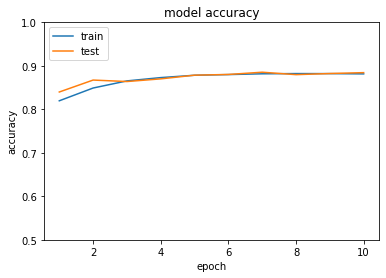

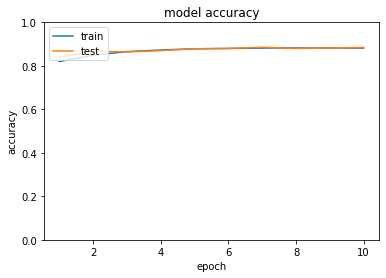

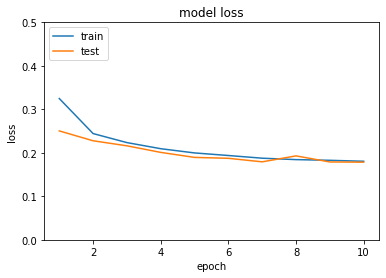

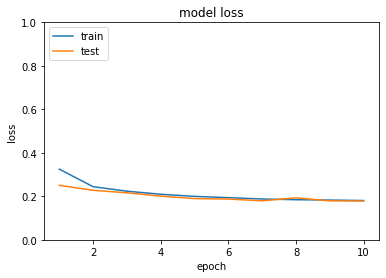

In [19]:
#Accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,len(acc) + 1)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc , label='Validation accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim([0.5, 1])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc , label='Validation accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim([0, 1])
plt.legend(['train', 'test'], loc='upper left')
plt.show()




#Loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss , label='Validation loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim([0, 0.5])
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss , label='Validation loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim([0, 1])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

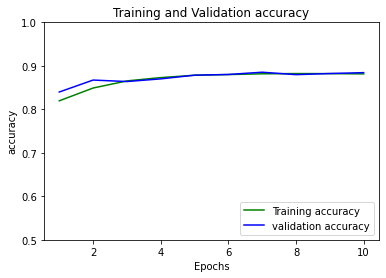

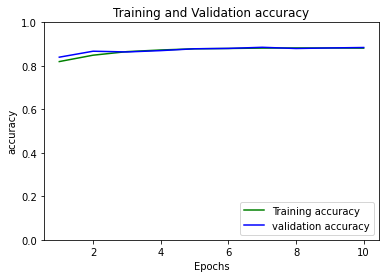

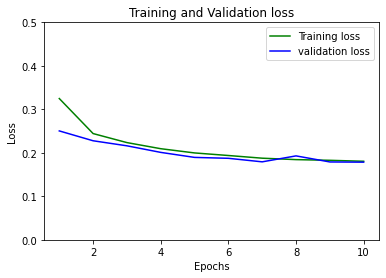

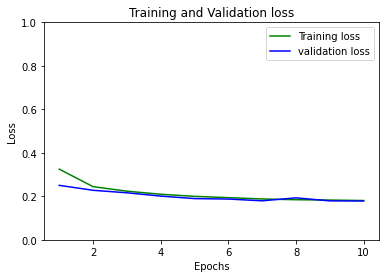

In [20]:
# Accuracy
acc = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,len(acc) + 1)
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()


plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


#loss
loss = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,len(acc) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 0.5])
plt.legend(loc='upper right')
plt.show()



plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()

[[2593    0    0    0    0    0    0    0    0]
 [   0 2605    0    0    0    0    1    2    0]
 [   0    0 2655   20    0    0    1    0    0]
 [   0    1  129 2450    0    0    0    0    0]
 [   0    0    0    0 2656    0    0    1    0]
 [   0    0    0    1    0 2560    0    0    0]
 [   0    0    0    0    0    0 2677    0    0]
 [   0    1    0    0    0    0    0 2679    0]
 [   0    2    0    0    0    0    0 2570    0]]


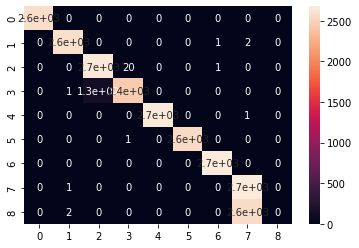

In [21]:
#Confusion matrix 
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)